# DT - decision Tree

## basic - iris data

In [1]:
import numpy as np
import os

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [79]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [80]:
import pydot
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
                out_file="./iris_tree.dot",
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True
                )

In [81]:
#안되는 경우, pip로 라이브러리들 설치하기, #path (graphviz 추가)

In [82]:
(graph,) = pydot.graph_from_dot_file("iris_tree.dot")
graph.write_png('dtree.png')

# EDA & DT - titanic

In [83]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## data loading & exploring

In [84]:
import pandas as pd # Data-Frame Handling

df = pd.read_csv("./Data/train.csv")
df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [86]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [87]:
df["Survived"].sum()

342

In [88]:
(df["Survived"] == 0).sum()

549

In [89]:
(df["Survived"] == 1).sum()

342

In [90]:
#del df['varnames']
#df

In [91]:
# Find the Base-Truth 

base_truth = df['Survived'].mean()
other_truth = 1-base_truth
print (base_truth, other_truth)

0.3838383838383838 0.6161616161616161


In [92]:
Corr_mat = df.corr(method='pearson')
print (Corr_mat)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [93]:
Corr_mat["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

## groupby aggregation & plotting

In [94]:
Class_Sex = df.groupby('Sex').mean()
Class_Sex

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


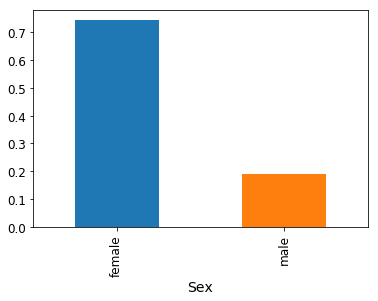

In [95]:
Class_Sex['Survived'].plot.bar()

In [96]:
df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


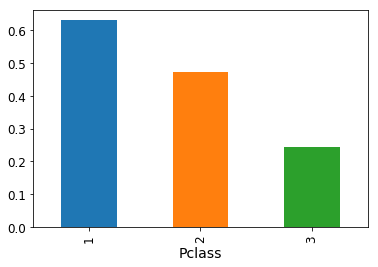

In [97]:
df.groupby('Pclass').mean()['Survived'].plot.bar() #but, 가독성이 떨어지는 코딩

In [98]:
Class_sex_pclass = df.groupby(['Pclass','Sex']).mean()
Class_sex_pclass

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

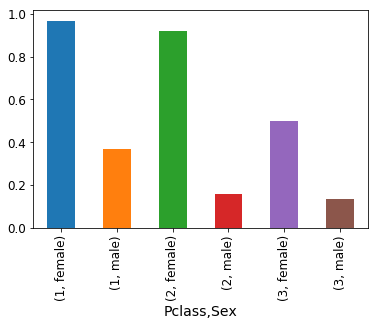

In [99]:
Class_sex_pclass['Survived'].plot.bar()

In [100]:
Group_by_age = pd.cut(df["Age"], np.arange(0,90,10))
#Group_by_age

In [101]:
Class_age = df.groupby(Group_by_age).mean()
#Class_age

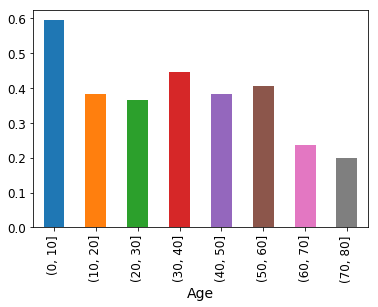

In [102]:
Class_age['Survived'].plot.bar()

In [103]:
Class_sex_age = df.groupby(["Sex", Group_by_age]).mean()
#Class_sex_age

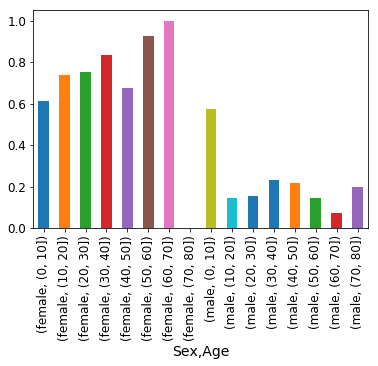

In [166]:
Class_sex_age['Survived'].plot.bar()

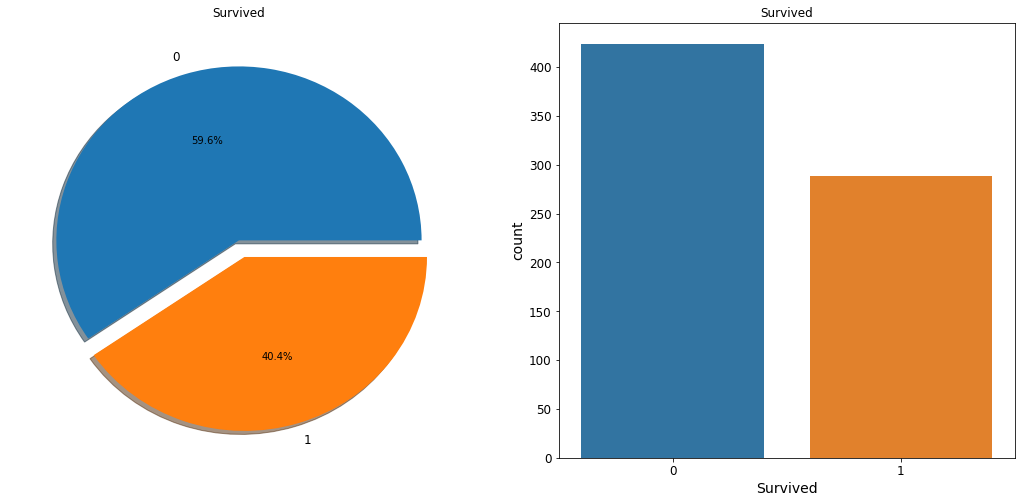

In [174]:
import seaborn as sb
import matplotlib.pyplot as plt

f, ax=plt.subplots(1, 2, figsize=(18,8))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sb.countplot('Survived',data=df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

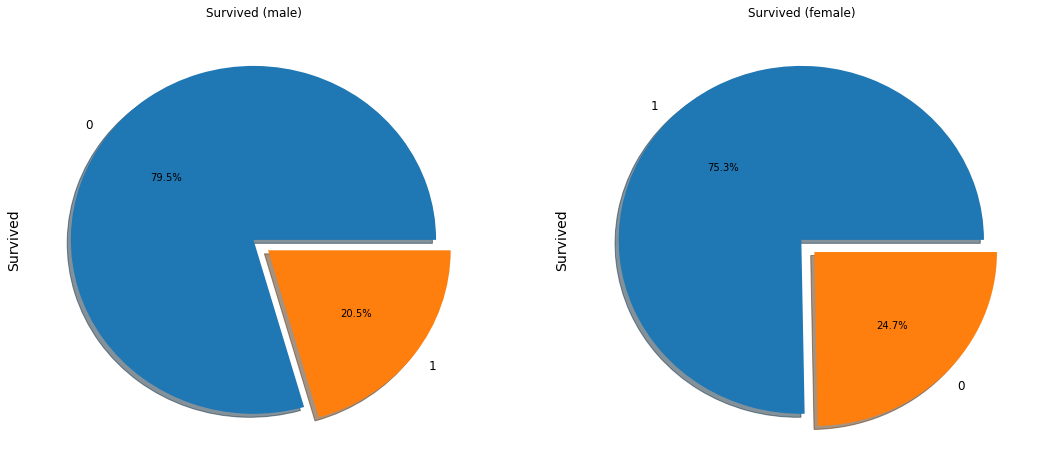

In [177]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Survived'][df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
df['Survived'][df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')
plt.show()

In [181]:
pd.crosstab([df['Sex'],df['Survived']],df['Pclass'],margins=True).style.background_gradient(cmap='summer_r')

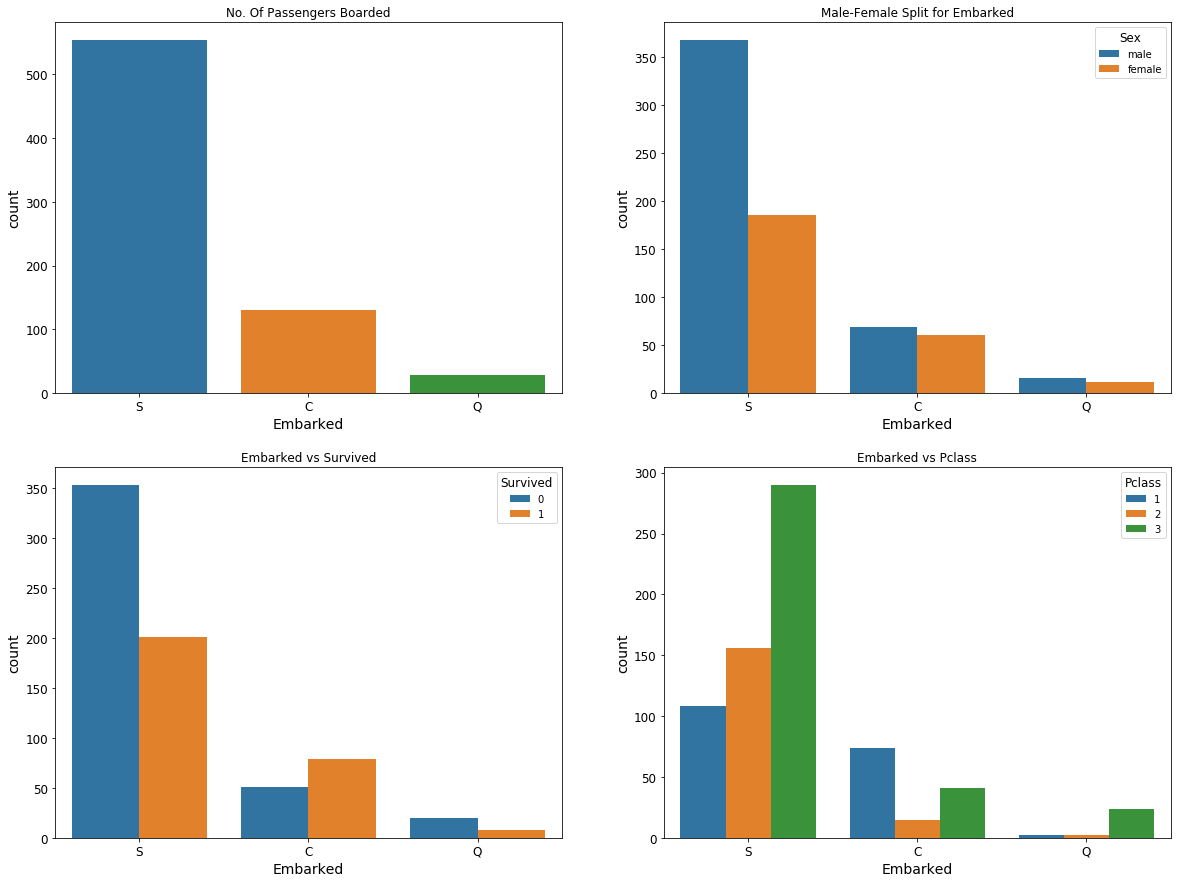

In [182]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sb.countplot('Embarked', data=df,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sb.countplot('Embarked',hue='Sex',data=df,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sb.countplot('Embarked',hue='Survived',data=df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sb.countplot('Embarked',hue='Pclass',data=df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.show()

## preprocessing

In [105]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [106]:
#na 탐색
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [107]:
#na채우기
#df['Embarked'].fillna('S',inplace=True)

In [108]:
df.loc[df["Cabin"].str.contains('.',regex=True,na=False),"Cabin_Bin"] = 1
#df.loc
#df['Cabin_Bin']

In [109]:
df["Cabin_Bin"].fillna(0, inplace=True)
#df

In [110]:
df = df.drop(["Cabin"],axis=1)
#df

In [111]:
shape(df)

(891, 12)

In [112]:
df2 = df.dropna()

In [113]:
shape(df2)

(712, 12)

In [114]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,1.0


In [115]:
## Parch > 0 and Age < 15

df.loc[(df["Parch"]>0) & (df["Age"]<15),"Child_with_Parent"] = 1
df["Child_with_Parent"].fillna(0, inplace=True)

In [116]:
df["Child_with_Parent"].sum()/len(df)

0.07856341189674523

In [117]:
shape(df)

(891, 13)

In [118]:
df = df.dropna()

In [119]:
shape(df)

(712, 13)

In [120]:
## Parch > 0 and Age < 15

#df.loc[(df["Parch"]>0) & (df["Age"]<15),"Child_with_Parent"] = 1
#df["Child_with_Parent"].fillna(0, inplace=True)

In [121]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Bin,Child_with_Parent
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1.0,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0.0,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0.0,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0.0,0.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,1.0,1.0


In [122]:
df["Child_with_Parent"].sum()/len(df)

0.09831460674157304

In [123]:
#

In [124]:
from sklearn import preprocessing

cleaned = df.copy()
LE = preprocessing.LabelEncoder()
cleaned.Sex = LE.fit_transform(cleaned.Sex)
cleaned.Embarked = LE.fit_transform(cleaned.Embarked)
cleaned.Cabin_Bin = LE.fit_transform(cleaned.Cabin_Bin)
cleaned.Child_with_Parent = LE.fit_transform(cleaned.Child_with_Parent)

cleaned = cleaned.drop(['Name','Ticket','PassengerId'],axis=1)

In [125]:
cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Bin,Child_with_Parent
0,0,3,1,22.0,1,0,7.2500,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,0,0
3,1,1,0,35.0,1,0,53.1000,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,0,0


In [126]:
cor_mat = cleaned.corr()
#cor_mat

## CrossValidation

In [127]:
from sklearn.model_selection import train_test_split

X = cleaned.drop(['Survived'],axis=1).values
y = cleaned['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)  #8:2로 분리

In [128]:
shape(X_train)

(569, 9)

In [129]:
shape(X_test)

(143, 9)

In [130]:
shape(y_train)

(569,)

In [131]:
shape(y_test)

(143,)

In [132]:
#X_train
#y_train

## decision tree

In [133]:
from sklearn import tree
clf_dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5) #'entropy' 도 가능
clf_dt_fit = clf_dt.fit(X_train,y_train)
dt_prediction = clf_dt_fit.predict(X_test)
#dt_prediction

In [134]:
import pydot
from sklearn.tree import export_graphviz

export_graphviz(clf_dt_fit,
                out_file="./titanic_tree.dot",
                feature_names=cleaned.columns[1:],
                class_names=cleaned.columns[0],
                rounded=True,
                filled=True
                )

In [135]:
(graph,) = pydot.graph_from_dot_file("titanic_tree.dot")
graph.write_png('titanic.png')

In [136]:
#accuracy, precision, recall, f1 score
from sklearn import metrics

In [137]:
metrics.accuracy_score(dt_prediction,y_test) #헷갈리면 걍 X_train부터 다 넣어봐라 :) 되나... 안됨...

0.7692307692307693

In [138]:
print (metrics.classification_report(dt_prediction,y_test)), "\n"

             precision    recall  f1-score   support

          0       0.88      0.75      0.81        93
          1       0.63      0.80      0.71        50

avg / total       0.79      0.77      0.77       143



(None, '\n')

In [139]:
print (metrics.confusion_matrix(dt_prediction,y_test)), "\n"

[[70 23]
 [10 40]]


(None, '\n')

## random forest

In [140]:
from sklearn.ensemble import RandomForestClassifier
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

clf_rf = RandomForestClassifier(n_estimators=50, min_samples_split=50, max_features=5, max_leaf_nodes=7, max_depth=7) #처음엔 n_estimator만 넣고 해보기
clf_rf_fit = clf_rf.fit(X_train,y_train)
rf_prediction = clf_rf_fit.predict(X_test)
#clf_rf_prediction

In [141]:
metrics.accuracy_score(rf_prediction,y_test) #위에거랑 계속 다시 해보기

0.8111888111888111

In [142]:
print (metrics.classification_report(rf_prediction,y_test)), "\n"

             precision    recall  f1-score   support

          0       0.90      0.79      0.84        91
          1       0.70      0.85      0.77        52

avg / total       0.83      0.81      0.81       143



(None, '\n')

In [143]:
print (metrics.confusion_matrix(rf_prediction,y_test)), "\n"

[[72 19]
 [ 8 44]]


(None, '\n')

 ## grid search for titanic data

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [10, 50, 100],  'min_samples_split':[30, 50, 100], 
     'max_features': [4, 5, 7], 'max_leaf_nodes':[5, 7, 9], 'max_depth':[5, 7, 9]},
    
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [50,100], 'max_features': [4,5,7]},
    
  ]

forest_reg = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring="accuracy")
# See the, http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 50, 100], 'min_samples_split': [30, 50, 100], 'max_features': [4, 5, 7], 'max_leaf_nodes': [5, 7, 9], 'max_depth': [5, 7, 9]}, {'bootstrap': [False], 'n_estimators': [50, 100], 'max_features': [4, 5, 7]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [147]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 5,
 'max_leaf_nodes': 9,
 'min_samples_split': 30,
 'n_estimators': 50}

In [148]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=5, max_leaf_nodes=9,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=30,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [149]:
cvres = grid_search.cv_results_
#cvres

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)

0.7750439367311072 {'max_depth': 5, 'max_features': 4, 'max_leaf_nodes': 5, 'min_samples_split': 30, 'n_estimators': 10}
0.7768014059753954 {'max_depth': 5, 'max_features': 4, 'max_leaf_nodes': 5, 'min_samples_split': 30, 'n_estimators': 50}
0.7680140597539543 {'max_depth': 5, 'max_features': 4, 'max_leaf_nodes': 5, 'min_samples_split': 30, 'n_estimators': 100}
0.7750439367311072 {'max_depth': 5, 'max_features': 4, 'max_leaf_nodes': 5, 'min_samples_split': 50, 'n_estimators': 10}
0.7768014059753954 {'max_depth': 5, 'max_features': 4, 'max_leaf_nodes': 5, 'min_samples_split': 50, 'n_estimators': 50}
0.7750439367311072 {'max_depth': 5, 'max_features': 4, 'max_leaf_nodes': 5, 'min_samples_split': 50, 'n_estimators': 100}
0.7750439367311072 {'max_depth': 5, 'max_features': 4, 'max_leaf_nodes': 5, 'min_samples_split': 100, 'n_estimators': 10}
0.7680140597539543 {'max_depth': 5, 'max_features': 4, 'max_leaf_nodes': 5, 'min_samples_split': 100, 'n_estimators': 50}
0.7680140597539543 {'max_dep

In [150]:
result_matric = pd.DataFrame(grid_search.cv_results_)
result_matric

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_split,param_n_estimators,param_bootstrap,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008778,0.000740,0.000600,4.897101e-04,5,4,5,30,10,NaN,...,0.775044,0.029523,144,0.828571,0.817582,0.821978,0.806593,0.826754,0.820296,0.007850
1,0.042082,0.003412,0.002988,8.358943e-06,5,4,5,30,50,NaN,...,0.776801,0.030969,131,0.817582,0.813187,0.824176,0.815385,0.826754,0.819417,0.005195
2,0.082435,0.004563,0.004786,3.986364e-04,5,4,5,30,100,NaN,...,0.768014,0.040075,229,0.848352,0.819780,0.828571,0.835165,0.835526,0.833479,0.009381
3,0.008178,0.000399,0.000997,1.168008e-07,5,4,5,50,10,NaN,...,0.775044,0.027477,144,0.830769,0.817582,0.810989,0.797802,0.804825,0.812393,0.011285
4,0.039167,0.000626,0.002599,4.934231e-04,5,4,5,50,50,NaN,...,0.776801,0.035514,131,0.826374,0.813187,0.826374,0.817582,0.831140,0.822931,0.006552
5,0.077643,0.001230,0.004598,4.987322e-04,5,4,5,50,100,NaN,...,0.775044,0.030550,144,0.837363,0.804396,0.826374,0.824176,0.828947,0.824251,0.010888
6,0.007980,0.000020,0.000598,4.879561e-04,5,4,5,100,10,NaN,...,0.775044,0.037859,144,0.802198,0.815385,0.793407,0.791209,0.809211,0.802282,0.009177
7,0.040088,0.001158,0.002593,4.887139e-04,5,4,5,100,50,NaN,...,0.768014,0.044380,229,0.808791,0.815385,0.793407,0.810989,0.807018,0.807118,0.007405
8,0.078452,0.001171,0.004588,4.879749e-04,5,4,5,100,100,NaN,...,0.768014,0.037529,229,0.808791,0.813187,0.804396,0.804396,0.811404,0.808435,0.003582
9,0.008178,0.000399,0.000799,3.992812e-04,5,4,7,30,10,NaN,...,0.787346,0.027099,63,0.841758,0.832967,0.830769,0.832967,0.820175,0.831727,0.006900


In [ ]:
#svm gscv

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_clf_pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC())
])

param_grid = [
        {'svm_clf__kernel': ['linear'], 'svm_clf__C': [10., 100., 1000.,10000.]},
        {'svm_clf__kernel': ['rbf'], 'svm_clf__C': [1.0,10.,100.,1000.0],
         'svm_clf__gamma': [0.01,0.1,1.0,]},
    ]

grid_search = GridSearchCV(svm_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

grid_search.fit(X_train,y_train)

cvres = grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)

0.789103690685413 {'svm_clf__C': 10.0, 'svm_clf__kernel': 'linear'}
0.789103690685413 {'svm_clf__C': 100.0, 'svm_clf__kernel': 'linear'}
0.7873462214411248 {'svm_clf__C': 1000.0, 'svm_clf__kernel': 'linear'}
0.789103690685413 {'svm_clf__C': 10000.0, 'svm_clf__kernel': 'linear'}
0.789103690685413 {'svm_clf__C': 1.0, 'svm_clf__gamma': 0.01, 'svm_clf__kernel': 'rbf'}
0.804920913884007 {'svm_clf__C': 1.0, 'svm_clf__gamma': 0.1, 'svm_clf__kernel': 'rbf'}
0.773286467486819 {'svm_clf__C': 1.0, 'svm_clf__gamma': 1.0, 'svm_clf__kernel': 'rbf'}
0.8242530755711776 {'svm_clf__C': 10.0, 'svm_clf__gamma': 0.01, 'svm_clf__kernel': 'rbf'}
0.7978910369068541 {'svm_clf__C': 10.0, 'svm_clf__gamma': 0.1, 'svm_clf__kernel': 'rbf'}
0.7609841827768014 {'svm_clf__C': 10.0, 'svm_clf__gamma': 1.0, 'svm_clf__kernel': 'rbf'}
0.8084358523725835 {'svm_clf__C': 100.0, 'svm_clf__gamma': 0.01, 'svm_clf__kernel': 'rbf'}
0.8014059753954306 {'svm_clf__C': 100.0, 'svm_clf__gamma': 0.1, 'svm_clf__kernel': 'rbf'}
0.73286467

In [73]:
result_matric = pd.DataFrame(grid_search.cv_results_)
result_matric

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm_clf__C,param_svm_clf__kernel,param_svm_clf__gamma,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013165,0.005245,0.000598,0.000488,10,linear,NaN,"{'svm_clf__C': 10.0, 'svm_clf__kernel': 'linear'}",0.798246,0.728070,...,0.789104,0.037910,7,0.808791,0.802198,0.800000,0.791209,0.782895,0.797019,0.009028
1,0.075798,0.030601,0.000805,0.000403,100,linear,NaN,"{'svm_clf__C': 100.0, 'svm_clf__kernel': 'line...",0.798246,0.728070,...,0.789104,0.037910,7,0.808791,0.802198,0.800000,0.791209,0.782895,0.797019,0.009028
2,9.738016,7.098155,0.000593,0.000484,1000,linear,NaN,"{'svm_clf__C': 1000.0, 'svm_clf__kernel': 'lin...",0.789474,0.728070,...,0.787346,0.037648,11,0.808791,0.802198,0.800000,0.791209,0.782895,0.797019,0.009028
3,31.141968,8.562200,0.000599,0.000489,10000,linear,NaN,"{'svm_clf__C': 10000.0, 'svm_clf__kernel': 'li...",0.798246,0.728070,...,0.789104,0.037910,7,0.806593,0.802198,0.800000,0.791209,0.782895,0.796579,0.008481
4,0.003986,0.000014,0.000790,0.000395,1,rbf,0.01,"{'svm_clf__C': 1.0, 'svm_clf__gamma': 0.01, 's...",0.798246,0.728070,...,0.789104,0.037910,7,0.795604,0.802198,0.778022,0.791209,0.785088,0.790424,0.008347
5,0.003789,0.000398,0.000606,0.000495,1,rbf,0.1,"{'svm_clf__C': 1.0, 'svm_clf__gamma': 0.1, 'sv...",0.754386,0.789474,...,0.804921,0.030245,3,0.843956,0.832967,0.843956,0.841758,0.839912,0.840510,0.004064
6,0.005183,0.000415,0.000606,0.000495,1,rbf,1,"{'svm_clf__C': 1.0, 'svm_clf__gamma': 1.0, 'sv...",0.754386,0.771930,...,0.773286,0.032016,12,0.892308,0.892308,0.892308,0.892308,0.885965,0.891039,0.002537
7,0.004195,0.000398,0.000796,0.000398,10,rbf,0.01,"{'svm_clf__C': 10.0, 'svm_clf__gamma': 0.01, '...",0.824561,0.798246,...,0.824253,0.016356,1,0.824176,0.824176,0.821978,0.828571,0.822368,0.824254,0.002340
8,0.005787,0.000398,0.000398,0.000488,10,rbf,0.1,"{'svm_clf__C': 10.0, 'svm_clf__gamma': 0.1, 's...",0.763158,0.807018,...,0.797891,0.018430,6,0.870330,0.885714,0.868132,0.872527,0.868421,0.873025,0.006537
9,0.008361,0.001466,0.000999,0.000005,10,rbf,1,"{'svm_clf__C': 10.0, 'svm_clf__gamma': 1.0, 's...",0.745614,0.754386,...,0.760984,0.034722,14,0.920879,0.914286,0.909890,0.912088,0.901316,0.911692,0.006359


# regression Tree

In [151]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [152]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

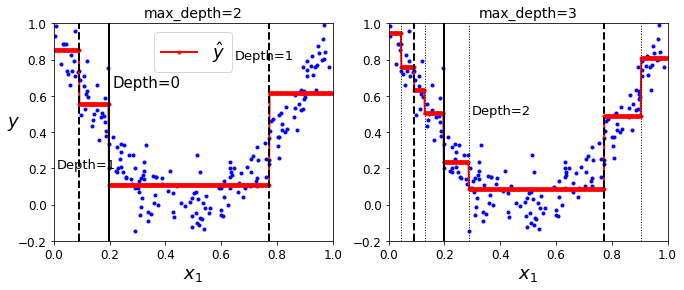

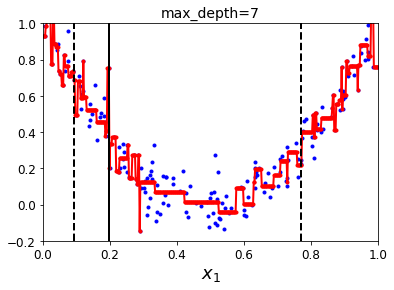

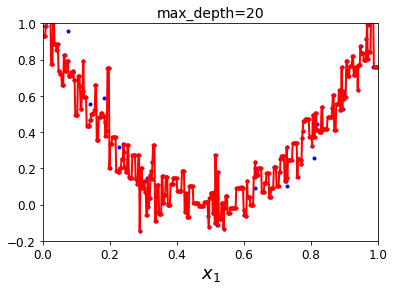

In [164]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg3 = DecisionTreeRegressor(random_state=42, max_depth=7)
tree_reg4= DecisionTreeRegressor(random_state=42, max_depth=20)

tree_reg1.fit(X, y)
tree_reg2.fit(X, y)
tree_reg3.fit(X, y)
tree_reg4.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()


plot_regression_predictions(tree_reg3, X, y, ylabel=None)
plt.title("max_depth=7", fontsize=14)
plt.show()

plot_regression_predictions(tree_reg4, X, y, ylabel=None)
plt.title("max_depth=20", fontsize=14)
plt.show()